In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import (Voronoi, voronoi_plot_2d, Delaunay)
from pebi_gmsh.site_locations import create_site_locations
from pebi_gmsh.generate_constrained_mesh import generate_constrained_mesh_2d
from pebi_gmsh.site_data import (FConstraint, CConstraint)

np.random.seed(1948)

def get_radius_from_voronoi(voronoi):
    radii = np.zeros((voronoi.points.shape[0],1))
    for i, region in enumerate(voronoi.point_region):
        if not region == -1:
            region_verts = voronoi.regions[region]
            for vert in region_verts:
                if not vert == -1:
                    radii[vert] = np.linalg.norm(voronoi.points[i] - voronoi.vertices[vert])
    return radii

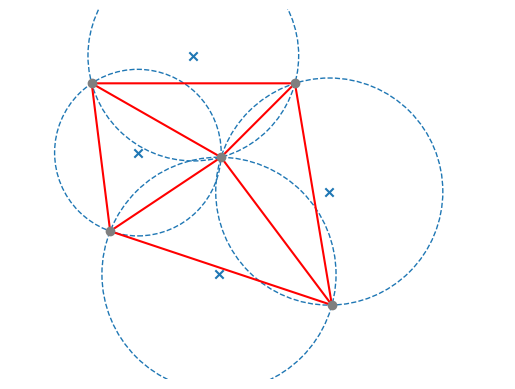

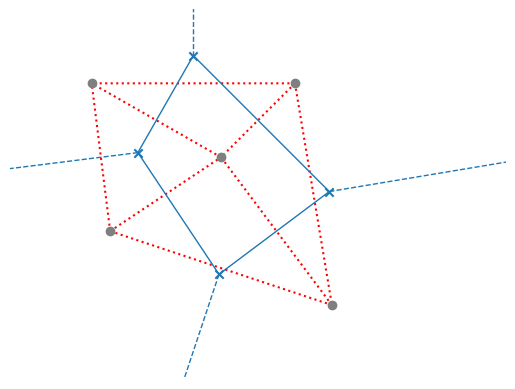

In [2]:

# Voronoi demonstration
fig, ax_0 = plt.subplots()
points = np.array([
    [0.05, 0.8],
    [0.4, 0.6],
    [0.7, 0.2],
    [0.1, 0.4],
    [0.6, 0.8]])
tris = Delaunay(points)
voronoi = Voronoi(points)
centroids = voronoi.vertices
radii = np.linalg.norm(centroids -  points[tris.simplices[:,0]], axis=1)
ax_0.triplot(points[:,0], points[:,1], tris.simplices, c="r")
for centroid, radius in zip(centroids, radii):
    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax_0.add_patch(circle)
ax_0.scatter(centroids[:,0], centroids[:,1], marker="x", color="C0")
ax_0.scatter(points[:,0], points[:,1],c="C7", zorder=10)
ax_0.axis("Equal")
ax_0.set_ylim(0,1)
ax_0.set_xlim(0,1)
ax_0.axis('off')
plt.show()

fig, ax_1 = plt.subplots()
voronoi_plot_2d(voronoi,ax_1,show_points = False, show_vertices = False, line_colors="C0")
ax_1.scatter(centroids[:,0], centroids[:,1], marker="x", color="C0")
ax_1.scatter(points[:,0], points[:,1],c="C7", zorder=10)
ax_1.triplot(points[:,0], points[:,1], tris.simplices, linestyle=":", c="r")
ax_1.axis("Equal")
ax_1.set_ylim(0,1)
ax_1.set_xlim(0,1)
ax_1.axis('off')

plt.show()



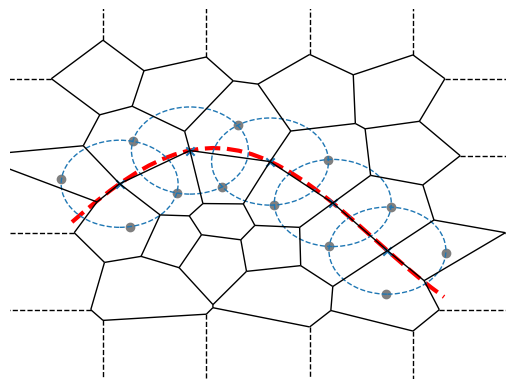

In [30]:

# Face constraint test


x = np.linspace(0.05,0.95,30)
y = 0.3*np.sin(4*x) + 0.35
f_constraint = FConstraint(np.c_[x,y], 0.2)



site_data = create_site_locations(f_constraints=[f_constraint])
sites = site_data.sites



mesh = generate_constrained_mesh_2d(site_data, h0=0.3)

fig, ax = plt.subplots()

tris = Delaunay(sites)
voronoi = Voronoi(sites)
centroids = voronoi.vertices
radii = get_radius_from_voronoi(voronoi)#np.linalg.norm(centroids -  sites[tris.simplices[5:,0]], axis=1)
# ax.triplot(points[:,0], points[:,1], tris.simplices, c="r")
circles = list(zip(centroids, radii))
circles.sort(key = lambda x: x[1])
for centroid, radius in circles[:5]:
    ax.scatter(centroid[0], centroid[1], c="C0", marker="x")
    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax.add_patch(circle)

ax.plot(x,y, "r--", zorder=-10, linewidth=3)
ax.set_ylim((0,1))
ax.set_xlim((0,1))

ax.scatter(sites[:,0], sites[:,1], c="C7")
ax.axis('off')
voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

plt.show()


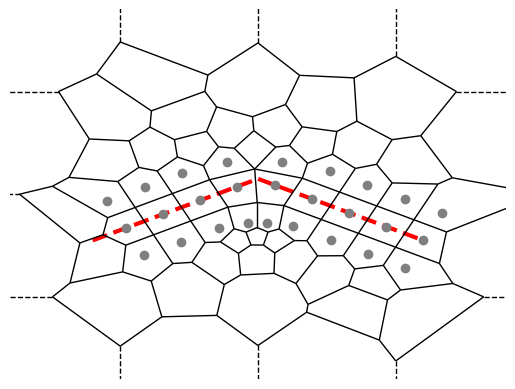

In [32]:
# Face constraint test


# x = np.linspace(0.05,0.95,30)
# y = 0.3*np.sin(4*x) + 0.35
x = np.array([0.1,0.5, 0.9])
y = np.array([0.35, 0.55, 0.35])
c_constraint = CConstraint(np.c_[x,y], 0.1, protection_sites=1)



site_data = create_site_locations(c_constraints=[c_constraint])
sites = site_data.sites



mesh = generate_constrained_mesh_2d(site_data, h0=0.4, popup=True)

fig, ax = plt.subplots()


ax.plot(x,y, "r--", zorder=-10, linewidth=3)
ax.set_ylim((0,1))
ax.set_xlim((0,1))

ax.scatter(sites[:,0], sites[:,1], marker="o",c="C7")
ax.axis('off')
voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

plt.show()

[[0.73809929 0.86371053]
 [0.28306592 0.50356306]
 [0.20470132 0.25236513]
 [0.52870097 0.40977806]
 [0.21538419 0.16565093]
 [0.89119588 0.5046479 ]
 [0.15984368 0.81859866]
 [0.35051798 0.80279935]
 [0.42766104 0.74943582]]


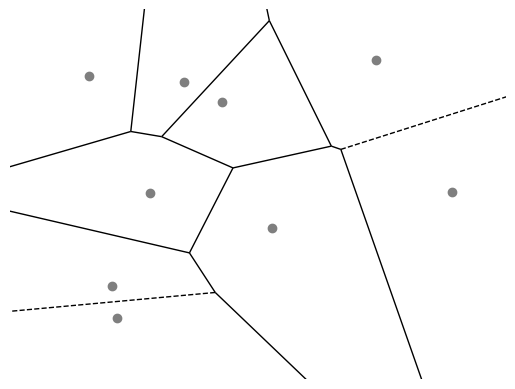

In [44]:
sites = np.array([
[0.73809929, 0.86371053],
[0.28306592, 0.50356306],
[0.20470132, 0.25236513],
[0.52870097, 0.40977806],
[0.21538419, 0.16565093],
[0.89119588, 0.5046479 ],
[0.15984368, 0.81859866],
[0.35051798, 0.80279935],
[0.42766104, 0.74943582]])

print(sites)
voronoi = Voronoi(sites)
fig, ax = plt.subplots()

ax.axis('off')

ax.scatter(sites[:,0], sites[:,1], c="C7")

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.show()